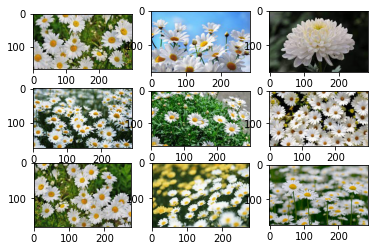

In [5]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
from google.colab import drive

folder= '/content/drive/MyDrive/Hoa/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder + 'cuc.'+ str(i) +'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()



In [7]:
folder = '/content/drive/MyDrive/Hoa/'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('cuc'):
    output = 0
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('mattroi'):
    output = 1
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('thuocduoc'):
    output = 2
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('vantho'):
    output = 3
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('Flowers_photos.npy', photos)
save('Flowers_labels.npy', labels)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150,150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(16, activation='softmax'))


model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(photos, labels, batch_size=64,epochs=100, verbose=1)
model.save('Hoa.h5')
classes = ["cuc","mattroi","vantho","thuocduoc"]


(40, 150, 150, 3) (40,)
Epoch 1/100
1/1 [==============================] - 1s 987ms/step - loss: 76.7230 - accuracy: 0.1500
Epoch 2/100
1/1 [==============================] - 0s 99ms/step - loss: 930.2875 - accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 91ms/step - loss: 655.5996 - accuracy: 0.2500
Epoch 4/100
1/1 [==============================] - 0s 89ms/step - loss: 1006.4025 - accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 83ms/step - loss: 387.0468 - accuracy: 0.2750
Epoch 6/100
1/1 [==============================] - 0s 83ms/step - loss: 257.0862 - accuracy: 0.2500
Epoch 7/100
1/1 [==============================] - 0s 78ms/step - loss: 51.8071 - accuracy: 0.2500
Epoch 8/100
1/1 [==============================] - 0s 76ms/step - loss: 82.8823 - accuracy: 0.2500
Epoch 9/100
1/1 [==============================] - 0s 75ms/step - loss: 32.3910 - accuracy: 0.3000
Epoch 10/100
1/1 [==============================] - 0s 71ms/step - los

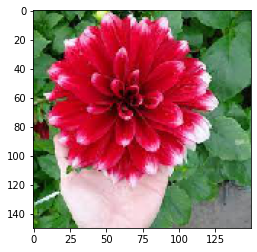

[[0.07605788 0.07374589 0.09518491 0.07864776 0.05618072 0.07997385
  0.05726746 0.07046353 0.04672633 0.06103488 0.03384262 0.06144124
  0.047517   0.04449882 0.05248048 0.06493659]]


'vantho'

In [11]:
img = load_img('/content/drive/MyDrive/Hoa/thuocduoc.3.jpg', target_size=(150,150))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,150,150,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
plt.show()
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]